In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.DataFrame({
    'X_1': [1, 1, 1, 0, 0, 0, 0, 1],
    'X_2': [0, 0, 0, 1, 0, 0, 0, 1],
    'Y': [1, 1, 1, 1, 0, 0, 0, 0]
})

In [3]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [4]:
clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [5]:
X = data[['X_1', 'X_2']]
y = data.Y

In [6]:
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [7]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML

In [8]:
style = '<style>svg{width:70% !important;height:70% !important;}</style>'
HTML(style)

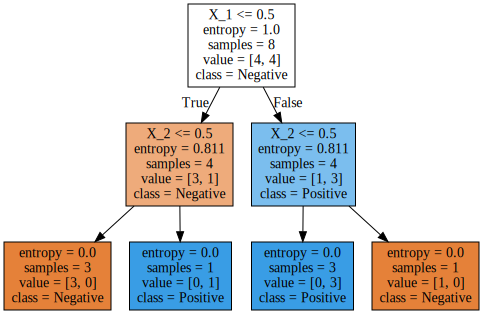

In [11]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X),
                                   class_names=['Negative', 'Positive'],
                                   filled=True))
display(SVG(graph.pipe(format='svg')))

##### Информационная энтропия: $$E=-\sum_{i=1}^{n}{p_i \cdot \log_2 \left( p_i \right)}$$
##### В случае равновероятности исходов: $$E=-\frac{1}{2} \cdot \log_2 \left( \frac{1}{2} \right) - \frac{1}{2} \cdot \log_2 \left( \frac{1}{2} \right) = \frac{1}{2} + \frac{1}{2} = 1$$
##### В случае только одного исхода: $$E = -1 \cdot \log_2 \left( 1 \right) -0 \cdot \log_2 \left( 0 \right) = 0$$
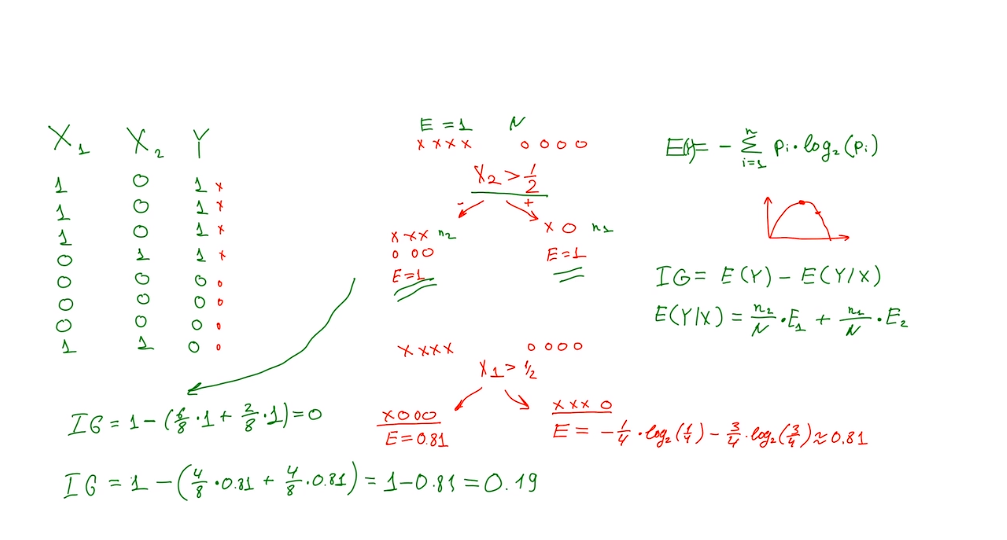
###### В следующих двух ячейках - решения задач про энтропию:

In [22]:
from math import log2

# разделение по шерстист
# 0
p_cat = 1
p_dog = 0
sh_e_0 = 0
# 1
p_cat = 5 / 9
p_dog = 4 / 9
sh_e_1 = - p_cat * log2(p_cat) - p_dog * log2(p_dog)

# разделение по гавкает
# 0
p_cat = 1
p_dog = 0
g_e_0 = 0
# 1
p_cat = 1 / 5
p_dog = 4 / 5
g_e_1 = - p_cat * log2(p_cat) - p_dog * log2(p_dog)

# разделение по лазает по деревьям
# 0
p_cat = 0
p_dog = 1
t_e_0 = 0
# 1
p_cat = 1
p_dog = 0
t_e_1 = 0

result = [sh_e_0, sh_e_1, g_e_0, g_e_1, t_e_0, t_e_1]
print(result)

[0, 0.9910760598382222, -0.0, 0.7219280948873623, 0, 0]


In [29]:
p_cat, p_dog = 0.6, 0.4
e = - p_cat * log2(p_cat) - p_dog * log2(p_dog)

e_yx_sh = 0.1 * sh_e_0 + 0.9 * sh_e_1
e_yx_g = 0.5 * g_e_0 + 0.5 * g_e_1
e_yx_t = 0.4 * t_e_0 + 0.6 * t_e_1
print(round(e - e_yx_sh, 2))
print(round(e - e_yx_g, 2))
print(round(e - e_yx_t, 2))
print(round(e_yx_sh, 2), round(e_yx_g, 2), round(e_yx_t, 2))

0.08
0.61
0.97
0.89 0.36 0.0
